#### From Itay Bavly, a chain-link number problem:

You start with the integers from one to 100, inclusive, and you want to organize them into a chain. The only rules for building this chain are that you can only use each number once and that each number must be adjacent in the chain to one of its factors or multiples. For example, you might build the chain:

4, 12, 24, 6, 60, 30, 10, 100, 25, 5, 1, 97

You have no numbers left to place after 97, leaving you with a finished chain of length 12.

What is the longest chain you can build?

In [154]:
import numpy as np

def get_factors(n):
    nums = np.arange(1,n)
    return nums[np.where(n % nums == 0)]

def get_multiples(n,ceil):
    nums = np.arange(n,ceil)
    return nums[np.where(nums % n == 0)]

def facts_and_mults(n, ceil):
    factors = get_factors(n)
    multiples = get_multiples(n, ceil)
    return np.concatenate([factors,multiples])

In [135]:
# The array in which to store all chains
chains = []

# The ceiling value to bound the factor and multiples
# that will compose the chain.
# If specifying accroding to puzzle, the ceiling values should be 101.
# I'm using a lower bound to test algorithm and limit computation.

ceil = 41

def make_chains(chain=[n], links=np.arange(1,ceil)):
    """
    
    :param chain @array - the chain composed thus far - starts with a seed value of n
    :param links @np.array - the array of links still available
    
    :returns None (appends finished chains to the global variable chains)
    """
    
    # Remove any links that are already in the chain
    links = links[~np.in1d(links, chain)]
    
    # Get the factors and multiples of the last link in the chain
    valid_links = facts_and_mults(chain[-1],ceil)
    
    # Filter the array of available links with the array of valid links
    possible_links = links[np.in1d(links, valid_links)]
    
    # If there aren't anymore possible inks, add the chains to the list of possible chains
    if possible_links.size == 0:
        chains.append(chain)
        
    else:
        
        for link in possible_links:
            
            #Use the list function to make a copy of the chain
            new_chain = list(chain)
            new_chain.append(link)
            
            #Delete the added link from the list of links 
            index = np.argwhere(possible_links==link)
            leftover_links = np.delete(links, index)
        
            make_chains(chain=new_chain, links=leftover_links)

# Start with a seed that's prime            
make_chains([19])

In [157]:
# How many chains are there, with a ceiling value of 41 and a seed value of 19?
len(chains)

1422239

In [158]:
# Let's get the length of the longest chain
lengths = np.array([len(item) for item in chains])
lengths[lengths.argmax()]

18

In [159]:
# What does the chain look like?
chains[lengths.argmax()]

[19, 1, 5, 30, 3, 36, 6, 24, 4, 32, 8, 40, 10, 20, 2, 26, 13, 39]

<IPython.core.display.Javascript object>


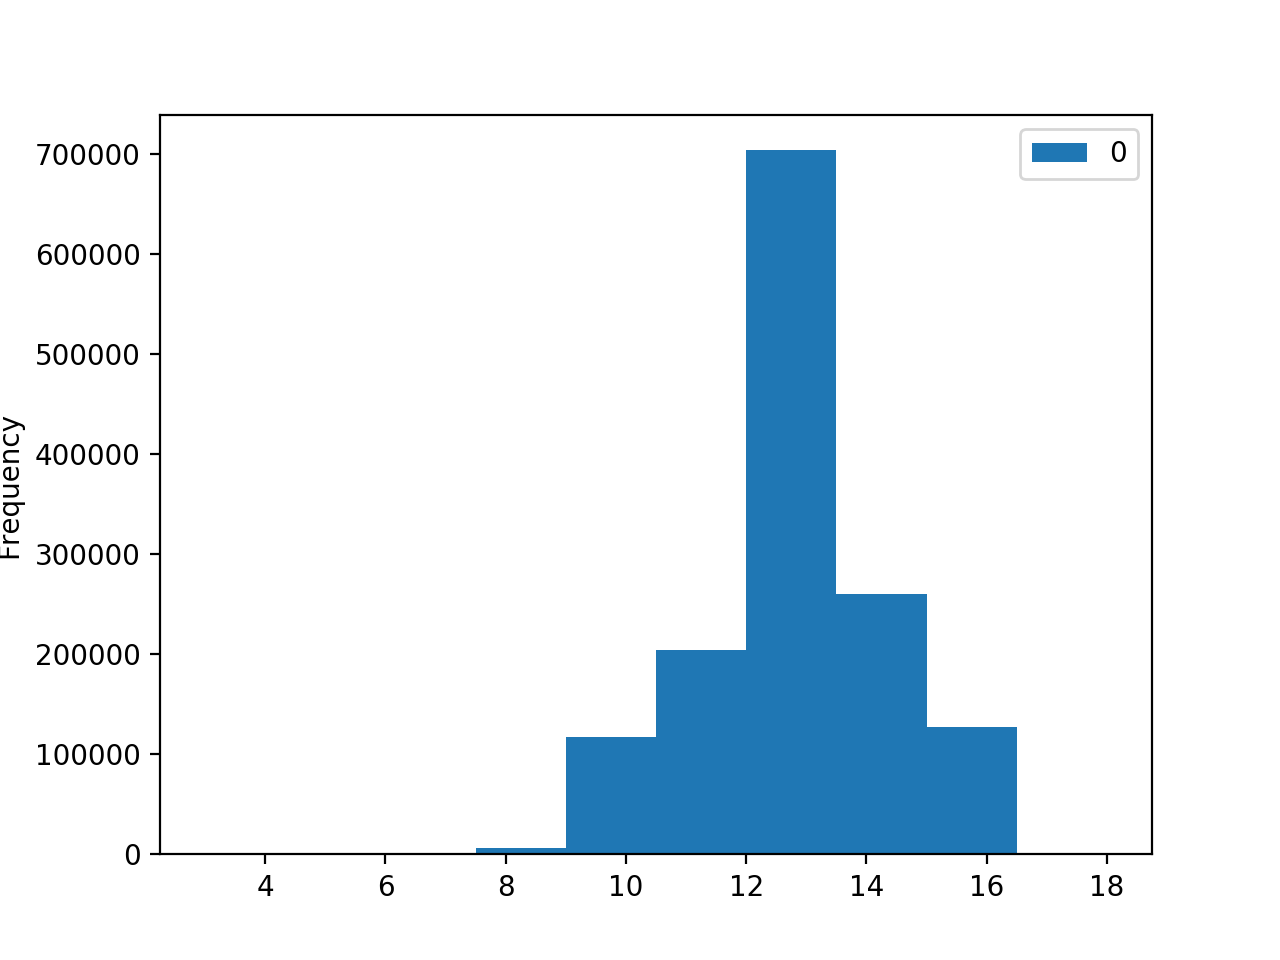

In [160]:
#What does the distribution of chain lengths look like?

%matplotlib notebook
import pandas as pd
df = pd.DataFrame(lengths)
df.plot(kind='hist')

In [166]:
# How many chains are tied for longest?
longest = list(df[df[0] == 18].index)
arr = np.array(chains)
len(arr[longest])

14

### Let's see where I can get to muddling through by hand.

In [153]:
factors = [97, 1, 100, 50, 25, 5, 10, 20, 40, 80, 8, 16, 32, 64, 4, 12, 24, 48, 96, 6, 18, 36, 72, 9, 27, 54, 3, 15, 30, 60, 2, 14, 28, 56, 7, 21, 42, 84]
len(factors)

38